## Modell Test und Anwendung

Im folgenden Notebook wird das trainierte Modell getestet und es wird gezeigt, wie sich eigene Bilder leicht einbinden lassen.

### Installation von Tensorflow 2.1
Aktuell ist Tensorflow 2.1 als stabil markiert, auch wenn in Google Colab schon der Release-Kandidat für 2.2 läuft.

In [1]:
!pip install tensorflow-gpu==2.1.0

     |████████████████████████████████| 421.8MB 36kB/s 
     |████████████████████████████████| 3.9MB 47.0MB/s 
     |████████████████████████████████| 450kB 52.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=d39274bab9e45b3f800730e1a15a776a0e9beddbdbee0133d5b798ecd8889fc6
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc2 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: gast 0.3.

## Bestehendes Modell laden
Das trainierte Modell kann entweder in die Colab-Instanz hochgeladen oder über GDrive eingebunden werden

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### YOLOv3 Quellcode laden

In [21]:
%cd  
!rm -rf ix-tut-yolov3
!git clone https://github.com/rawar/ix-tut-yolov3.git
%cd ix-tut-yolov3
!rm -rf ix-tut-yolov3-data
!git clone https://github.com/rawar/ix-tut-yolov3-data.git
!ls -trl

/root
Cloning into 'ix-tut-yolov3'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 61 (delta 16), reused 54 (delta 12), pack-reused 0
Unpacking objects: 100% (61/61), done.
/root/ix-tut-yolov3
Cloning into 'ix-tut-yolov3-data'...
remote: Enumerating objects: 2672, done.
remote: Total 2672 (delta 0), reused 0 (delta 0), pack-reused 2672
Receiving objects: 100% (2672/2672), 52.62 MiB | 8.89 MiB/s, done.
Resolving deltas: 100% (252/252), done.
total 36
-rw-r--r-- 1 root root   73 Apr  5 15:42 README.md
-rw-r--r-- 1 root root 2163 Apr  5 15:42 image_demo.py
drwxr-xr-x 3 root root 4096 Apr  5 15:42 core
drwxr-xr-x 2 root root 4096 Apr  5 15:42 notebooks
-rw-r--r-- 1 root root 4055 Apr  5 15:42 test.py
-rw-r--r-- 1 root root  132 Apr  5 15:42 requirements.txt
-rw-r--r-- 1 root root 3525 Apr  5 15:42 train.py
drwxr-xr-x 2 root root 4096 Apr  5 15:42 tests
drwxr-xr-x 8 root root 4096 Apr  5 1

### Hochladen eines beliebigen Bildes

In [32]:
from google.colab import files
files.upload()

Saving test9.jpg to test9.jpg


{'test9.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x01\xa0\x01\xa0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x9

### Objekterkennung ausführen

In [0]:
import cv2
import numpy as np
import core.utils as utils
import tensorflow as tf
from core.yolov3 import YOLOv3, decode
from PIL import Image

#### Klassen und Testbild festlegen

In [0]:
input_size   = 416
image_path   = "test9.jpg"
CLASSES      = ["r2d2","c3po","luke-skywalker","obi-wan-kinobi","sturmtruppler"]
NUM_CLASS    = len(CLASSES)
bbox_tensors = []

#### Bild laden und Konvertieren

In [0]:
input_layer  = tf.keras.layers.Input([input_size, input_size, 3])
feature_maps = YOLOv3(input_layer)

original_image      = cv2.imread(image_path)
original_image      = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
original_image_size = original_image.shape[:2]

image_data = utils.image_preporcess(np.copy(original_image), [input_size, input_size])
image_data = image_data[np.newaxis, ...].astype(np.float32)

for i, fm in enumerate(feature_maps):
    bbox_tensor = decode(fm, i)
    bbox_tensors.append(bbox_tensor)

#### Modell mit den Schichten initialisieren

In [0]:
model = tf.keras.Model(input_layer, bbox_tensors)

#### Modell laden

In [43]:
!ls -l '/content/drive/My Drive/data/ix-tut-model'

total 242917
-rw------- 1 root root     60441 Mar 29 18:42 starwars_yolov3.data-00000-of-00002
-rw------- 1 root root 248685812 Feb  9 15:21 yolov3.h5


In [44]:
model.load_weights("/content/drive/My Drive/data/ix-tut-model/starwars_yolov3")

#### Modell anzeigen

In [45]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
conv2d_375 (Conv2D)             (None, 416, 416, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_360 (BatchN (None, 416, 416, 32) 128         conv2d_375[0][0]                 
__________________________________________________________________________________________________
tf_op_layer_LeakyRelu_360 (Tens [(None, 416, 416, 32 0           batch_normalization_360[0][0]    
______________________________________________________________________________________________

#### Modellvorhersage auf dem Beispielbild ausführen

In [0]:
pred_bbox = model.predict(image_data)

In [47]:
pred_bbox = [tf.reshape(x, (-1, tf.shape(x)[-1])) for x in pred_bbox]
pred_bbox = tf.concat(pred_bbox, axis=0)
bboxes = utils.postprocess_boxes(pred_bbox, original_image_size, input_size, 0.3)
bboxes = utils.nms(bboxes, 0.45, method='nms')

for bbox in bboxes:
    print(bbox)
    coor = np.array(bbox[:4], dtype=np.int32)
    score = bbox[4]
    class_ind = int(bbox[5])
    class_name = CLASSES[class_ind]
    score = '%.4f' % score
    xmin, ymin, xmax, ymax = list(map(str, coor))
    bbox_mess = ' '.join([class_name, score, xmin, ymin, xmax, ymax]) + '\n'
    print('\t' + str(bbox_mess).strip())

image = utils.draw_bbox(original_image, bboxes, classes=CLASSES)
image = Image.fromarray(image)
image.save("predicted-test9.jpg")

[133.50912476 130.68237305 289.74472046 292.58987427   0.5112797
   0.        ]
	r2d2 0.5113 133 130 289 292


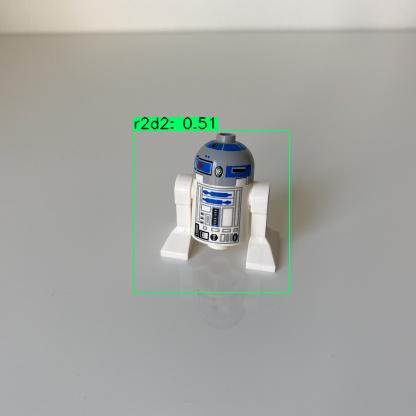

In [48]:
from IPython.display import Image, display
display(Image("predicted-test9.jpg"))